In [34]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [12.0, 4.0]

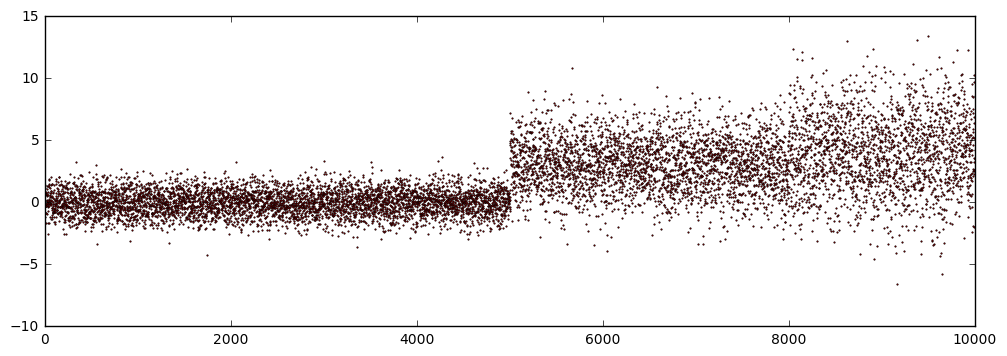

In [35]:
import random

def generate_rand_dataset(scale=1000):
    """
    Generate a noisy dataset with some jumps in mean and jumps in deviance so that we can look
    at different filters.  
    
    Where X<=5 distribute mean=0 stddev=1
    Where 5<X<=8 distribute mean=3 stddev=2
    Where 8<X<=10 distribute mean=4 stdev=3
    """
    ret = []
    for time in range(0, 10 * scale):
        if time <= 5.0 * scale:
            ret.append(
                (float(time), random.gauss(0, 1))
            )
        elif time <= 8 * scale:
            ret.append(
                (float(time), random.gauss(3, 2))
            )
        else:
            ret.append(
                (float(time), random.gauss(4, 3))
            )
    return ret

dataset = generate_rand_dataset()

plt.plot([x for x, y in dataset], [y for x, y in dataset], 'ro', markersize=1.0)

plt.show()

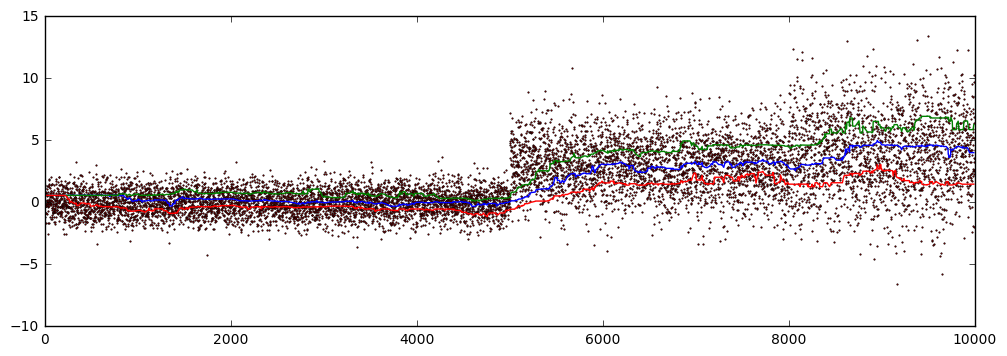

In [41]:
import numpy as np

def calc_stats(samples):
    """
    Given an arbitrary list, return the mean, upper&lower quartile, and 95&5th percentiles
    """
    samples = np.array(samples)
    return {
        'mean': np.percentile(samples, 50),
        '75p': np.percentile(samples, 75),
        '25p': np.percentile(samples, 25),
        '95p': np.percentile(samples, 95),
        '5p': np.percentile(samples, 5),
    }

def reservoir_sample(series, reservoir_size=50, decay_probability=0.1):
    """
    Given a series, approximate the mean, upper&lower quartile, and 95&5th percentile
    for the last reservoir_size*(1 / decay_probability) samples of data
    
    at 1000 points per second, reservoir size 50, and decay probability 0.1, approximates
    the last half-second of data
    """
    R = [series[0][1]] * reservoir_size
    
    res = []
    for time, point in series:
        if random.random() < decay_probability:
            idx = random.randint(0, len(R) - 1)
            R[idx] = point
            res.append(
                (time, calc_stats(R))
            )
    return res
            
sampled_percentiles = reservoir_sample(dataset, reservoir_size=50, decay_probability=0.1)

plt.plot([x for x, y in dataset],
         [y for x, y in dataset], 'ro', markersize=1.0)
plt.plot([x for x, y in sampled_percentiles],
         [y['mean'] for x, y in sampled_percentiles],
         '-')
plt.plot([x for x, y in sampled_percentiles],
         [y['75p'] for x, y in sampled_percentiles],
         '-')
plt.plot([x for x, y in sampled_percentiles],
         [y['25p'] for x, y in sampled_percentiles],
         '-')

plt.show()